## Import Libraries

In [1]:
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split

## Load in Data (PM2.5, SO2, CO)

In [2]:
#Load in PM2.5 Data
path = '/home1/10208/takazawaizack/ACSC_project_files/'
fname = path + 'pm25_hawaii_all.feather'
df_PM = pd.read_feather(fname)

In [3]:
#Load in SO2 Data
path = '/home1/10208/takazawaizack/ACSC_project_files/'
fname = path + 'HI_SO2_2015_2025.feather'
df_SO2 = pd.read_feather(fname)

In [4]:
#load in CO Data
path = '/home1/10208/takazawaizack/ACSC_project_files/'
fname = path + 'HI_CO_2015_2025.feather'
df_CO = pd.read_feather(fname)

#### Filter through datasets

In [5]:
#display(df_CO)

In [6]:
#display all columns in one row to look clean datasets
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)

#df_SO2.iloc[5]

## Clean Datasets (PM2.5, SO2, CO)

# PM2.5

In [7]:
#Rename and standardize date to prep for visualizations down the road
#PM2.5 DATA!
df_PM = df_PM.rename(columns={
    "Latitude": "lat",
    "Longitude": "lon",
    "Arithmetic.Mean": "PM25",
    "Date.Local": "Date"
})

df_PM = df_PM[df_PM["Local.Site.Name"].str.strip() != ""]
df_PM["Date"] = pd.to_datetime(df_PM["Date"])
df_PM["year"] = df_PM["Date"].dt.year

In [8]:
#Drop missing coordinates and PM values
df_PM = df_PM.dropna(subset=["PM25", "lat", "lon", "Local.Site.Name"])

In [9]:
#Drop columns
df_PM = df_PM.drop(columns=["State.Code",
                     "County.Code",
                     "Site.Num",
                     "Parameter.Code",
                     "POC",
                     "Datum",
                     "Event.Type",
                     "Parameter.Name",
                     "Method.Code",
                     "Method.Name",
                     "Address",
                     "State.Name",
                     "Date.of.Last.Change",
                    "Pollutant.Standard", 
                    "AQI",
                     ])

# SO2

In [10]:
df_SO2 = df_SO2.rename(columns={
    "Latitude": "lat",
    "Longitude": "lon",
    "Arithmetic Mean": "SO2",
    "Date Local": "Date"
})

df_SO2["Date"] = pd.to_datetime(df_SO2["Date"])
df_SO2["year"] = df_SO2["Date"].dt.year

In [11]:
#Drop missing coordinates and PM values
df_SO2 = df_SO2.dropna(subset=["SO2", "lat", "lon"])

In [12]:
#Drop columns
df_SO2 = df_SO2.drop(columns=["State Code",
                     "County Code",
                     "Site Num",
                     "Parameter Code",
                     "POC",
                     "Datum",
                     "Event Type",
                     "Parameter Name",
                     "Method Code",
                     "Method Name",
                     "Address",
                     "State Name",
                     "Date of Last Change",
                    "Pollutant Standard", 
                    "AQI",
                     ])

# CO

In [13]:
df_CO = df_CO.rename(columns={
    "Latitude": "lat",
    "Longitude": "lon",
    "Arithmetic Mean": "CO",
    "Date Local": "Date"
})

df_CO["Date"] = pd.to_datetime(df_CO["Date"])
df_CO["year"] = df_CO["Date"].dt.year

In [14]:
#Drop missing coordinates and PM values
df_CO = df_CO.dropna(subset=["CO", "lat", "lon"])

In [15]:
#Drop columns
df_CO = df_CO.drop(columns=["State Code",
                     "County Code",
                     "Site Num",
                     "Parameter Code",
                     "POC",
                     "Datum",
                     "Event Type",
                     "Parameter Name",
                     "Method Code",
                     "Method Name",
                     "Address",
                     "State Name",
                     "Date of Last Change",
                    "Pollutant Standard", 
                    "AQI",
                     ])

In [16]:
#display all columns in one row to look clean datasets
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df_CO.iloc[5]

lat                              21.323745
lon                            -158.088613
Sample Duration                     1 HOUR
Date                   2015-01-06 00:00:00
Units of Measure         Parts per million
Observation Count                       24
Observation Percent                  100.0
CO                                     0.4
1st Max Value                          0.4
1st Max Hour                             0
Local Site Name                    Kapolei
County Name                       Honolulu
City Name                    Not in a city
CBSA Name               Urban Honolulu, HI
year                                  2015
Name: 90797, dtype: object

In [17]:
#display(df_CO)

In [18]:
df_PM_1hr = df_PM[df_PM["Sample.Duration"] == "1 HOUR"]

In [19]:
df_PM_24hr = df_PM[df_PM["Sample.Duration"] == "24 HOUR"]

In [20]:
df_SO2_1hr = df_SO2[df_SO2["Sample Duration"] == "1 HOUR"]

In [21]:
df_CO_1hr = df_CO[df_CO["Sample Duration"] == "1 HOUR"]

In [22]:
df_PM_1hr.shape, df_PM_24hr.shape, df_SO2_1hr.shape, df_CO_1hr.shape

((58099, 15), (1061, 15), (47926, 15), (9629, 15))

In [23]:
display(df_SO2_1hr)

lat        lon Sample Duration       Date   Units of Measure  \
61656    19.43080 -155.25780          1 HOUR 2015-01-01  Parts per billion   
61657    19.43080 -155.25780          1 HOUR 2015-01-02  Parts per billion   
61658    19.43080 -155.25780          1 HOUR 2015-01-03  Parts per billion   
61659    19.43080 -155.25780          1 HOUR 2015-01-04  Parts per billion   
61660    19.43080 -155.25780          1 HOUR 2015-01-05  Parts per billion   
...           ...        ...             ...        ...                ...   
3172366  21.30758 -157.85542          1 HOUR 2025-03-27  Parts per billion   
3172367  21.30758 -157.85542          1 HOUR 2025-03-28  Parts per billion   
3172368  21.30758 -157.85542          1 HOUR 2025-03-29  Parts per billion   
3172369  21.30758 -157.85542          1 HOUR 2025-03-30  Parts per billion   
3172370  21.30758 -157.85542          1 HOUR 2025-03-31  Parts per billion   

         Observation Count  Observation Percent        SO2  1st Max Value  \
61656                   20                 83.0   5.500000           47.0   
61657                   22                 92.0   9.590909          110.0   
61658                   13                 54.0  21.230769           90.0   
61659                   23                 96.0   8.260870          104.0   
61660                   23                 96.0  77.956522          379.0   
...                    ...                  ...        ...            ...   
3172366                 24                100.0   1.837500            1.9   
3172367                 24                100.0   2.291667            3.3   
3172368                 24                100.0   1.983333            2.5   
3172369                 24                100.0   2.225000            3.5   
3172370                 23                 96.0   1.808696            1.9   

         1st Max Hour                                Local Site Name  \
61656               3  Hawaii Volcanoes NP - Kilauea Visitors Center   
61657               5  Hawaii Volcanoes NP - Kilauea Visitors Center   
61658              17  Hawaii Volcanoes NP - Kilauea Visitors Center   
61659               9  Hawaii Volcanoes NP - Kilauea Visitors Center   
61660              11  Hawaii Volcanoes NP - Kilauea Visitors Center   
...               ...                                            ...   
3172366             0                                       Honolulu   
3172367            19                                       Honolulu   
3172368            19                                       Honolulu   
3172369            11                                       Honolulu   
3172370             1                                       Honolulu   

        County Name                       City Name           CBSA Name  year  
61656        Hawaii  Hawaii Volcanoes National Park            Hilo, HI  2015  
61657        Hawaii  Hawaii Volcanoes National Park            Hilo, HI  2015  
61658        Hawaii  Hawaii Volcanoes National Park            Hilo, HI  2015  
61659        Hawaii  Hawaii Volcanoes National Park            Hilo, HI  2015  
61660        Hawaii  Hawaii Volcanoes National Park            Hilo, HI  2015  
...             ...                             ...                 ...   ...  
3172366    Honolulu                        Honolulu  Urban Honolulu, HI  2025  
3172367    Honolulu                        Honolulu  Urban Honolulu, HI  2025  
3172368    Honolulu                        Honolulu  Urban Honolulu, HI  2025  
3172369    Honolulu                        Honolulu  Urban Honolulu, HI  2025  
3172370    Honolulu                        Honolulu  Urban Honolulu, HI  2025  

[47926 rows x 15 columns]

In [24]:
sensor_counts_24hr = df_PM_24hr["Local.Site.Name"].value_counts()
sensor_counts_24hr

Local.Site.Name
Kapolei        780
Hilo           128
Pearl City      99
Sand Island     54
Name: count, dtype: int64

In [25]:
sensor_counts_1hr = df_PM_1hr["Local.Site.Name"].value_counts()
sensor_counts_1hr

Local.Site.Name
Kona                                             8809
HOVE                                             4860
Kapolei                                          4724
Pahala                                           4268
Hilo                                             4243
Mountain View 23                                 3763
Honolulu                                         3727
Sand Island                                      3664
Kahului                                          3548
Kihei                                            2987
Pearl City                                       2590
Niumalu                                          2514
Hawaii Volcanoes NP - Kilauea Visitors Center    1740
Kailua-Kona                                      1516
KS Hawaii                                        1503
Waikoloa                                         1255
Naalehu-TS                                        844
Paia                                              815
Hawaii Volca

## Visualize any missing data points from each sensor within the past 10 years

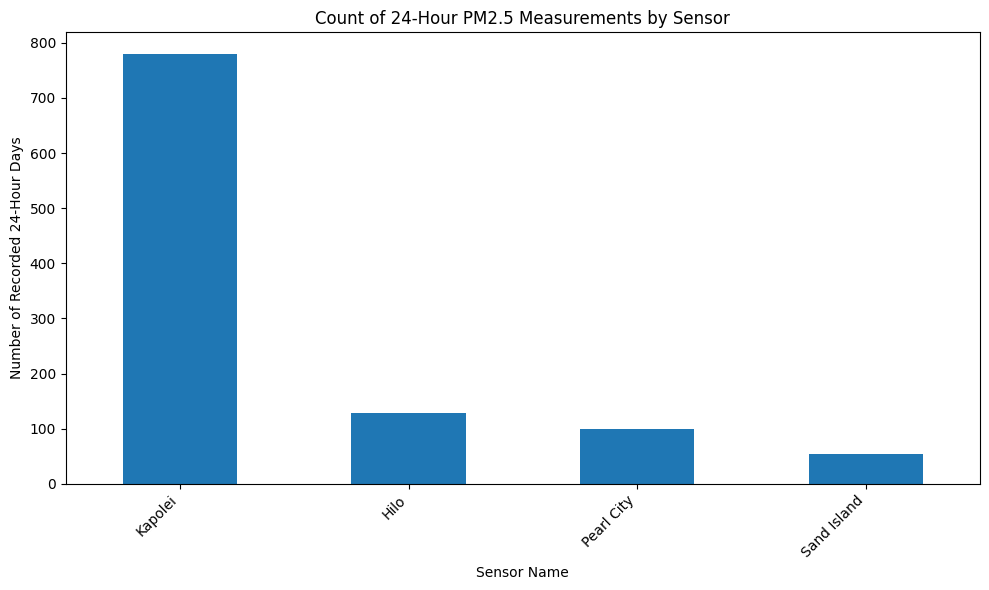

In [26]:
sensor_counts_24hr = df_PM_24hr["Local.Site.Name"].value_counts()

plt.figure(figsize=(10, 6))
sensor_counts_24hr.plot(kind="bar")

plt.xlabel("Sensor Name")
plt.ylabel("Number of Recorded 24-Hour Days")
plt.title("Count of 24-Hour PM2.5 Measurements by Sensor")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


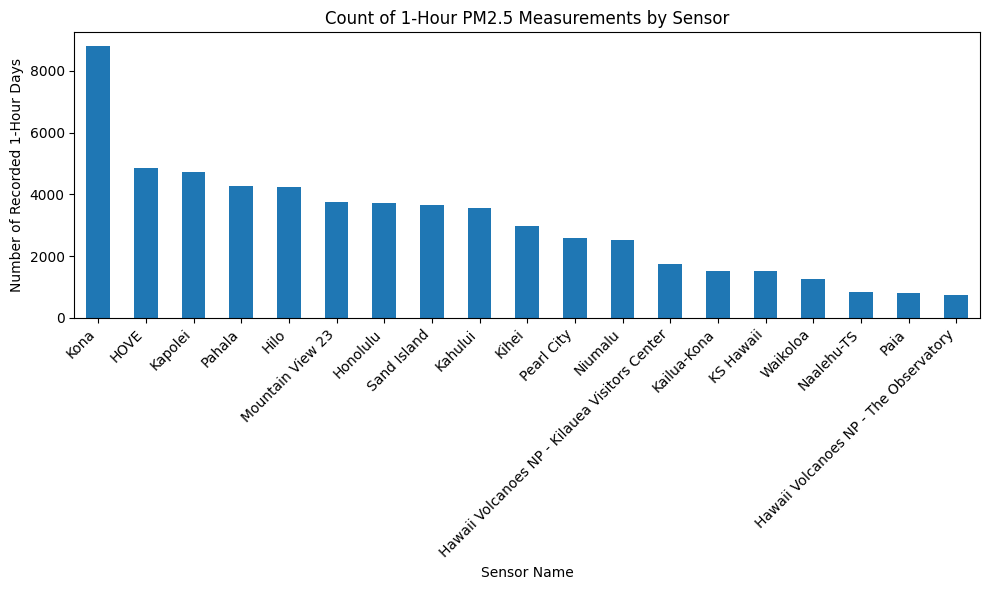

In [27]:
sensor_counts_PM_1hr = df_PM_1hr["Local.Site.Name"].value_counts()

plt.figure(figsize=(10, 6))
sensor_counts_PM_1hr.plot(kind="bar")

plt.xlabel("Sensor Name")
plt.ylabel("Number of Recorded 1-Hour Days")
plt.title("Count of 1-Hour PM2.5 Measurements by Sensor")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


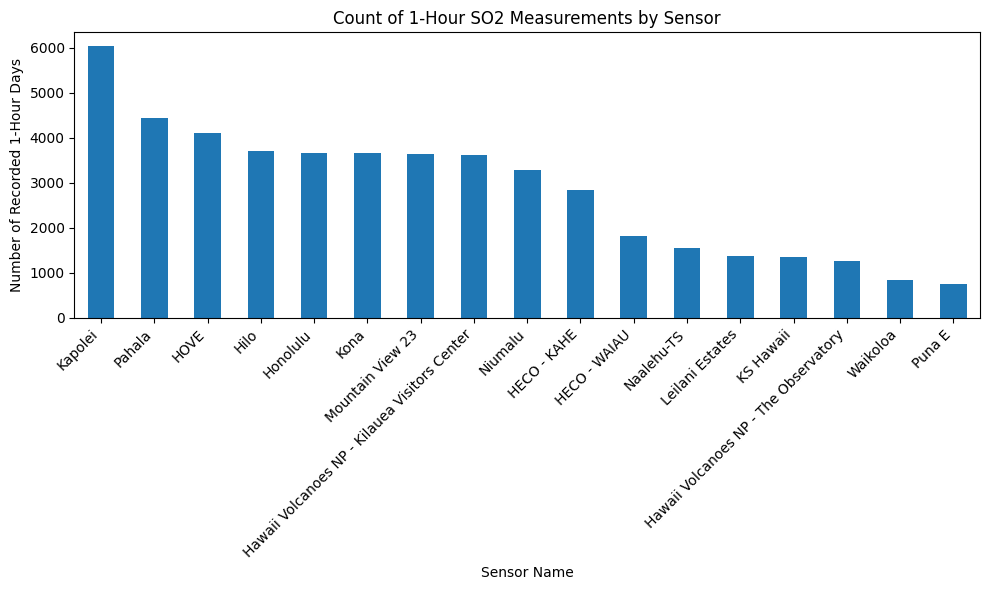

In [28]:
sensor_counts_SO2_1hr = df_SO2_1hr["Local Site Name"].value_counts()

plt.figure(figsize=(10, 6))
sensor_counts_SO2_1hr.plot(kind="bar")

plt.xlabel("Sensor Name")
plt.ylabel("Number of Recorded 1-Hour Days")
plt.title("Count of 1-Hour SO2 Measurements by Sensor")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [29]:
#sensor_counts_CO_1hr = df_CO_1hr["Local Site Name"].value_counts()

#plt.figure(figsize=(10, 6))
#sensor_counts_CO_1hr.plot(kind="bar")

#plt.xlabel("Sensor Name")
#plt.ylabel("Number of Recorded 1-Hour Days")
#plt.title("Count of 1-Hour SO2 Measurements by Sensor")
#plt.xticks(rotation=45, ha="right")

#plt.tight_layout()
#plt.show()


/tmp/ipykernel_2688337/147604993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PM_1hr["Date"] = pd.to_datetime(df_PM_1hr["Date"])


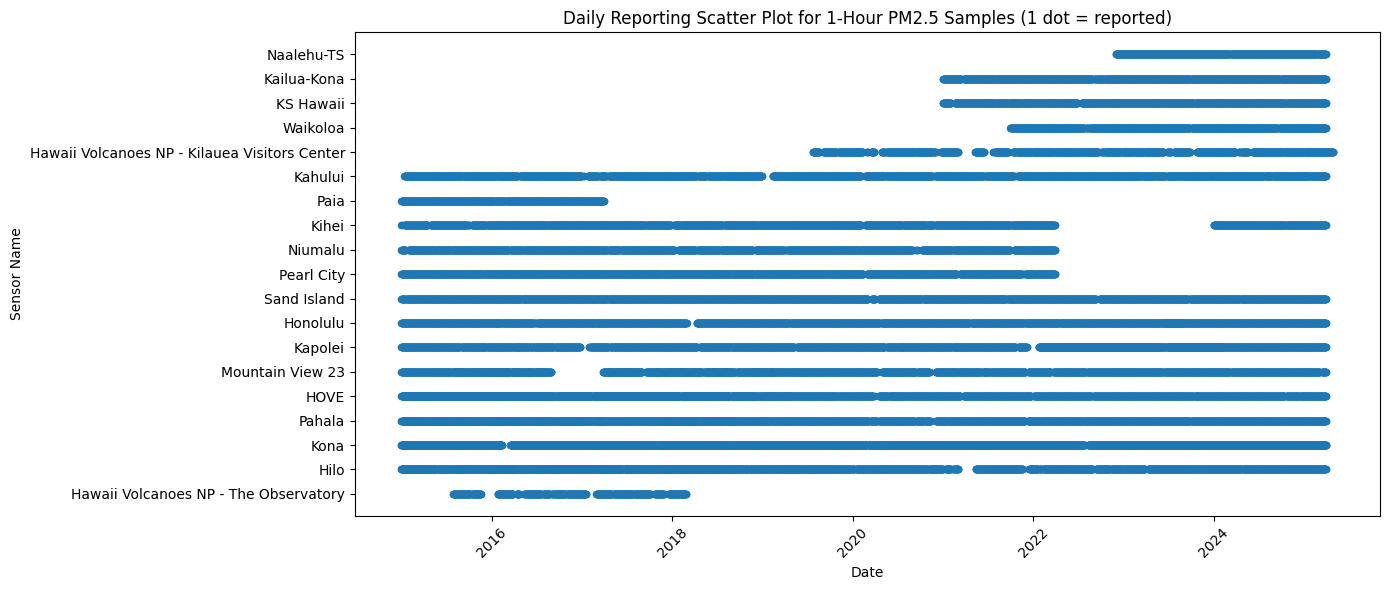

In [30]:
# --- Make sure your dates are datetime ---
df_PM_1hr["Date"] = pd.to_datetime(df_PM_1hr["Date"])

# --- Create a baseline with 1 dot per sensor per date ---
df_PM_plot = df_PM_1hr[["Date", "Local.Site.Name"]].copy()
df_PM_plot["Reported"] = 1   # mark each reported measurement

# --- Scatter Plot ---
plt.figure(figsize=(14, 6))

plt.scatter(
    df_PM_plot["Date"],
    df_PM_plot["Local.Site.Name"],
    s=20
)

plt.xlabel("Date")
plt.ylabel("Sensor Name")
plt.title("Daily Reporting Scatter Plot for 1-Hour PM2.5 Samples (1 dot = reported)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_2688337/1686248100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SO2_1hr["Date"] = pd.to_datetime(df_SO2_1hr["Date"])


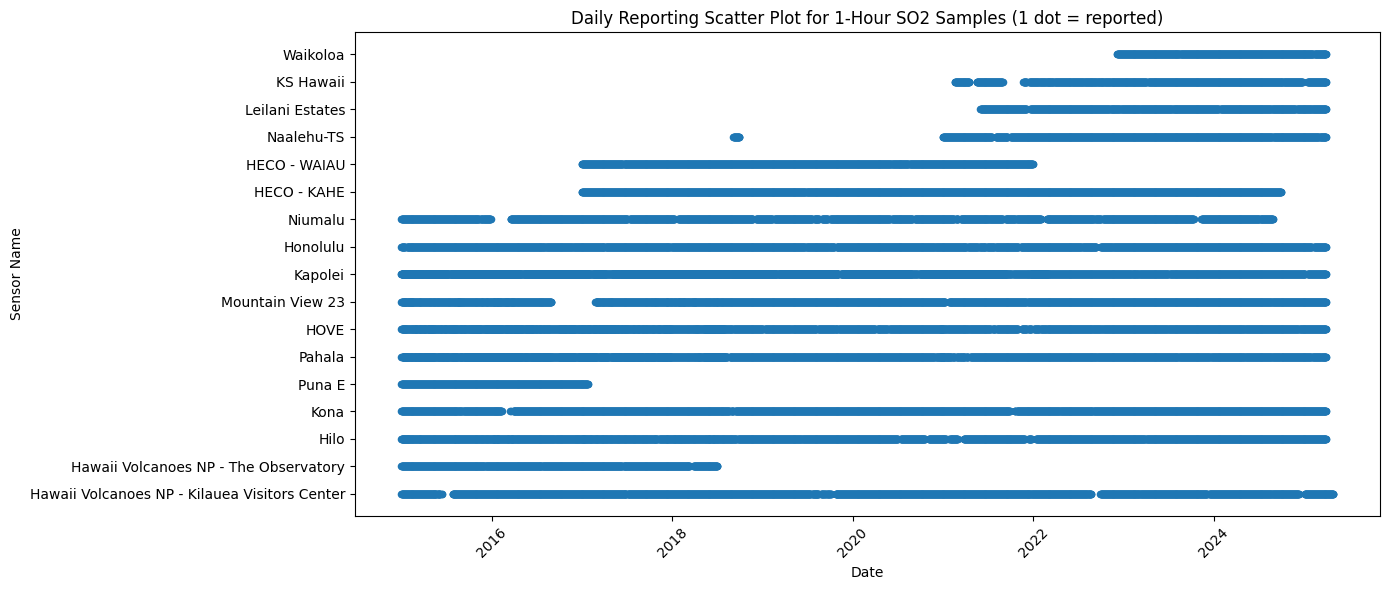

In [31]:
#SO2 missing data
# --- Make sure your dates are datetime ---
df_SO2_1hr["Date"] = pd.to_datetime(df_SO2_1hr["Date"])

# --- Create a baseline with 1 dot per sensor per date ---
df_SO2_plot = df_SO2_1hr[["Date", "Local Site Name"]].copy()
df_SO2_plot["Reported"] = 1   # mark each reported measurement

# --- Scatter Plot ---
plt.figure(figsize=(14, 6))

plt.scatter(
    df_SO2_plot["Date"],
    df_SO2_plot["Local Site Name"],
    s=20
)

plt.xlabel("Date")
plt.ylabel("Sensor Name")
plt.title("Daily Reporting Scatter Plot for 1-Hour SO2 Samples (1 dot = reported)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
# --- FIX NEGATIVE OR ZERO VALUES ---
df_PM_1hr = df_PM_1hr[df_PM_1hr["PM25"] > 0]
df_SO2_1hr = df_SO2_1hr[df_SO2_1hr["SO2"] > 0]

In [33]:
# Optional: scale PM2.5 for better bubble sizing
df_PM["PM25_size"] = np.interp(df_PM["PM25"],
                            (df_PM["PM25"].min(), df_PM["PM25"].max()),
                            (5, 25))  # scales between 5 and 25


In [34]:
# Filter to just Hawaii and years of interest
#df_PM = df[(df["year"] >= 2015) & (df["year"] <= 2025)]


In [35]:
# List all unique monitoring sites (PM, SO2, CO)
unique_sites = df_PM["Local.Site.Name"].unique()

print("Total unique sensors:", len(unique_sites))
print(unique_sites)

Total unique sensors: 19
['Hawaii Volcanoes NP - The Observatory' 'Hilo' 'Kona' 'Pahala' 'HOVE'
 'Mountain View 23' 'Kapolei' 'Honolulu' 'Sand Island' 'Pearl City'
 'Niumalu' 'Kihei' 'Paia' 'Kahului'
 'Hawaii Volcanoes NP - Kilauea Visitors Center' 'Waikoloa' 'KS Hawaii'
 'Kailua-Kona' 'Naalehu-TS']


In [36]:
# List all unique sample duration periods (PM, SO2, CO)
unique_sample_duration = df_PM["Sample.Duration"].unique()

print("Different Sample Duration Periods:", len(unique_sample_duration))
print(unique_sample_duration)

Different Sample Duration Periods: 3
['1 HOUR' '24-HR BLK AVG' '24 HOUR']


In [37]:
# List all unique counties (PM, SO2, CO)
unique_county = df_PM["County.Name"].unique()

print("Counties:", len(unique_county))
print(unique_county)


Counties: 4
['Hawaii' 'Honolulu' 'Kauai' 'Maui']


In [38]:
# List all unique pollution standards
#unique_standard = df["Pollutant.Standard"].unique()

#print("Pollutant Standards:", len(unique_standard))
#print(unique_standard)

In [39]:
# Group by site and date (to avoid hourly repeats)
daily_max_PM = df_PM.groupby(["Local.Site.Name", "Date"], as_index=False)["PM25"].max()

In [40]:
# Group by site and date (to avoid hourly repeats)
daily_max_SO2 = df_SO2.groupby(["Local Site Name", "Date"], as_index=False)["SO2"].max()

In [41]:
# Identify exceedance days for PM - according to 
daily_max_PM["Exceeded"] = daily_max_PM["PM25"] > 35

In [42]:
# Identify exceedance days for SO2
daily_max_SO2["Exceeded"] = daily_max_SO2["SO2"] > 0.075

In [43]:
# Count exceedances per site PM
exceedance_counts_PM = daily_max_PM.groupby("Local.Site.Name")["Exceeded"].sum().reset_index()
exceedance_counts_PM.rename(columns={"Exceeded": "Days_Exceeded"}, inplace=True)

In [44]:
# Count exceedances per site PM
exceedance_counts_SO2 = daily_max_SO2.groupby("Local Site Name")["Exceeded"].sum().reset_index()
exceedance_counts_SO2.rename(columns={"Exceeded": "Days_Exceeded"}, inplace=True)

In [45]:
# Sort descending
exceedance_counts_PM = exceedance_counts_PM.sort_values("Days_Exceeded", ascending=False)

In [46]:
# Sort descending
exceedance_counts_SO2 = exceedance_counts_SO2.sort_values("Days_Exceeded", ascending=False)

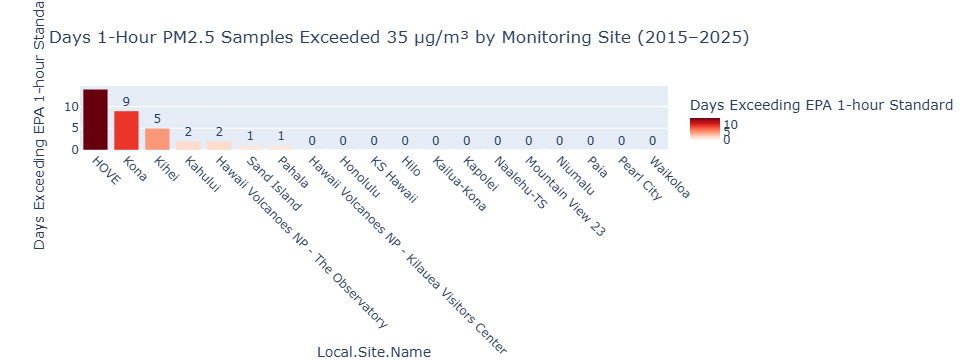

In [47]:
#Bar chart 1-Hour PM Samples Exceeding 1-Hour Standard from 2015-2025
fig = px.bar(exceedance_counts_PM,
             x="Local.Site.Name",
             y="Days_Exceeded",
             color="Days_Exceeded",
             color_continuous_scale="reds",
             title="Days 1-Hour PM2.5 Samples Exceeded 35 µg/m³ by Monitoring Site (2015–2025)",
             labels={"Days_Exceeded": "Days Exceeding EPA 1-hour Standard"},
             text="Days_Exceeded")

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=45)
fig.show()

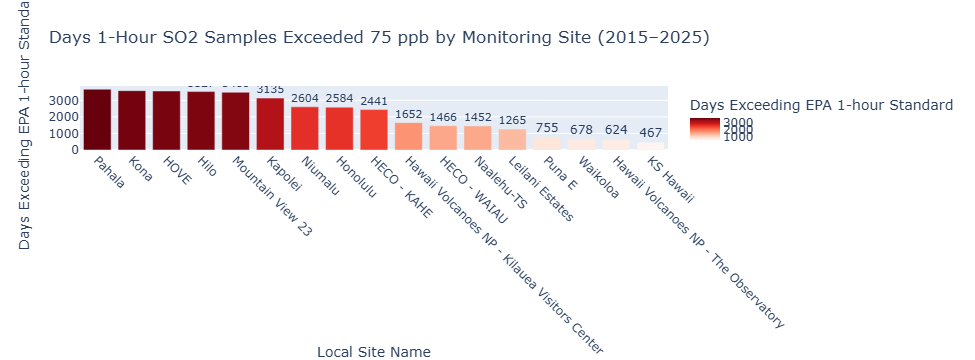

In [48]:
#Bar chart 1-Hour SO2 Samples Exceeding 1-Hour Standard from 2015-2025
fig = px.bar(exceedance_counts_SO2,
             x="Local Site Name",
             y="Days_Exceeded",
             color="Days_Exceeded",
             color_continuous_scale="reds",
             title="Days 1-Hour SO2 Samples Exceeded 75 ppb by Monitoring Site (2015–2025)",
             labels={"Days_Exceeded": "Days Exceeding EPA 1-hour Standard"},
             text="Days_Exceeded")

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=45)
fig.show()

In [49]:
#1-Hour PM2.5 Concentration Over Time by Monitoring Site (2015–2025)
fig = px.line(daily_max_PM,
              x="Date",
              y="PM25",
              color="Local.Site.Name",
              title="1-Hour PM2.5 Concentration Over Time by Monitoring Site (2015–2025)",
              labels={"PM25": "PM2.5 (µg/m³)"})

# Add EPA threshold line
fig.add_hline(y=35, line_dash="dash", line_color="red",
              annotation_text="EPA 1-hour Limit (35 µg/m³)",
              annotation_position="top left")
fig.update_layout(
    legend_title_text="Monitoring Site",
    width=1400,
    height=800,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02,
        font=dict(size=8)
    )
)

fig.show()


In [50]:
#1-Hour SO2 Concentration Over Time by Monitoring Site (2015–2025)
fig = px.line(daily_max_SO2,
              x="Date",
              y="SO2",
              color="Local Site Name",
              title="1-Hour SO2 Concentration Over Time by Monitoring Site (2015–2025)",
              labels={"SO2": "SO2 (ppb)"})

# Add EPA threshold line
fig.add_hline(y=75, line_dash="dash", line_color="red",
              annotation_text="EPA 1-hour Limit (75 ppb)",
              annotation_position="top left")
fig.update_layout(
    legend_title_text="Monitoring Site",
    width=1400,
    height=800,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02,
        font=dict(size=8)
    )
)
fig.show()


In [51]:
# Merge coordinates into exceedance counts
site_coords = df_PM_1hr.groupby("Local.Site.Name")[["lat", "lon"]].mean().reset_index()
exceedance_map = exceedance_counts_PM.merge(site_coords, on="Local.Site.Name", how="left")

# Interactive map
fig = px.scatter_map(exceedance_map,
                        lat="lat",
                        lon="lon",
                        color="Days_Exceeded",
                        size="Days_Exceeded",
                        hover_name="Local.Site.Name",
                        color_continuous_scale="reds",
                        map_style="carto-positron",
                        zoom=5,
                        title="1-Hour PM2.5 Exceedance Frequency by Monitoring Site Across Hawai‘i (2015–2025)",
                        width = 1200,
                        height = 600
                    )
fig.update_coloraxes(
    cmin=so2_min,
    cmax=so2_max,
    colorbar=dict(title="Days Exceeded")
)
fig.show()


NameError: name 'so2_min' is not defined

In [ ]:
so2_min = exceedance_map["Days_Exceeded"].min()
so2_max = exceedance_map["Days_Exceeded"].max()


In [ ]:
so2_min, so2_max

In [ ]:
# Merge coordinates into exceedance counts
site_coords = df_SO2_1hr.groupby("Local Site Name")[["lat", "lon"]].mean().reset_index()
exceedance_map = exceedance_counts_SO2.merge(site_coords, on="Local Site Name", how="left")

# Interactive map
fig = px.scatter_map(exceedance_map,
                        lat="lat",
                        lon="lon",
                        color="Days_Exceeded",
                        size="Days_Exceeded",
                        hover_name="Local Site Name",
                        color_continuous_scale="reds",
                        map_style="carto-positron",
                        zoom=4,
                        title="1-Hour SO2 Exceedance Frequency by Monitoring Site Across Hawai‘i (2015–2025)",
                        width=1200,
                        height=600,
                    )
fig.update_coloraxes(
    cmin=so2_min,
    cmax=so2_max,
    colorbar=dict(title="Days Exceeded")
)


fig.show()


In [ ]:
df_PM_1hr["Year"] = df_PM_1hr["Date"].dt.year
annual_trend = df_PM_1hr.groupby("Year")["PM25"].mean().reset_index()

fig = px.scatter(annual_trend,
                 x="Year",
                 y="PM25",
                 trendline="ols",
                 title="Annual Average 1-Hour PM2.5 Concentration Across Hawai‘i (2015–2025)",
                 labels={"PM25": "Average PM2.5 (µg/m³)"})
fig.show()


In [ ]:
df_SO2_1hr["Year"] = df_SO2_1hr["Date"].dt.year
annual_trend = df_SO2_1hr.groupby("Year")["SO2"].mean().reset_index()

fig = px.scatter(annual_trend,
                 x="Year",
                 y="SO2",
                 trendline="ols",
                 title="Annual Average 1-Hour SO2 Concentration Across Hawai‘i (2015–2025)",
                 labels={"SO2": "Average SO2 (ppb)"})
fig.show()


In [ ]:
import plotly.graph_objects as go

# --- Compute annual averages ---
df_PM_1hr["Year"] = df_PM_1hr["Date"].dt.year
pm_trend = df_PM_1hr.groupby("Year")["PM25"].mean().reset_index()

df_SO2_1hr["Year"] = df_SO2_1hr["Date"].dt.year
so2_trend = df_SO2_1hr.groupby("Year")["SO2"].mean().reset_index()

fig = go.Figure()

# ------------------------
# PM2.5 DATA (markers only)
# ------------------------
fig.add_trace(go.Scatter(
    x=pm_trend["Year"],
    y=pm_trend["PM25"],
    mode="markers",
    name="PM2.5 (µg/m³)"
))

# PM2.5 Trendline (OLS)
pm_coef = np.polyfit(pm_trend["Year"], pm_trend["PM25"], 1)
pm_trendline = np.polyval(pm_coef, pm_trend["Year"])

fig.add_trace(go.Scatter(
    x=pm_trend["Year"],
    y=pm_trendline,
    mode="lines",
    name="PM2.5 Trendline",
    line=dict(dash="dot")
))


# ------------------------
# SO2 DATA (markers only)
# ------------------------
fig.add_trace(go.Scatter(
    x=so2_trend["Year"],
    y=so2_trend["SO2"],
    mode="markers",
    name="SO2 (ppb)",
    yaxis="y2"
))

# SO2 Trendline (OLS)
so2_coef = np.polyfit(so2_trend["Year"], so2_trend["SO2"], 1)
so2_trendline = np.polyval(so2_coef, so2_trend["Year"])

fig.add_trace(go.Scatter(
    x=so2_trend["Year"],
    y=so2_trendline,
    mode="lines",
    name="SO2 Trendline",
    yaxis="y2",
    line=dict(dash="dot")
))


# --- Layout with dual axes ---
fig.update_layout(
    title="Annual Average 1-Hour PM2.5 vs SO2 Across Hawai‘i (2015–2025)",
    xaxis=dict(title="Year"),

    yaxis=dict(
        title="PM2.5 (µg/m³)",
        showgrid=False
    ),

    yaxis2=dict(
        title="SO2 (ppb)",
        overlaying="y",
        side="right"
    ),

    legend=dict(x=0.99, y=0.99, xanchor="right", yanchor="top")
)

fig.show()

In [ ]:
annual = df_PM_1hr.groupby("year")["PM25"].mean().reset_index()

fig_ts = px.scatter(annual, x="year", y="PM25",
                    title="Annual Average PM2.5 Across Hawai‘i (2015–2025)",
                    labels={"PM25": "Average PM2.5 (µg/m³)", "year": "Year"})
fig_ts.add_vline(x=2018, line_dash="dash", line_color="red",
                 annotation_text="Kīlauea eruption", annotation_position="top left")

fig_ts.show()


In [ ]:

df_PM_1hr["Year"] = df_PM_1hr["Date"].dt.year
annual_trend = df_PM_1hr.groupby("Year")["PM25"].mean().reset_index()

fig = px.scatter(
    annual_trend,
    x="Year",
    y="PM25",
    trendline="ols",
    title="Annual Average 1-Hour PM2.5 Concentration Across Hawai‘i (2015–2025)",
    labels={"PM25": "Average PM2.5 (µg/m³)"}
)

# ---------------------------
# Vertical Event Lines
# ---------------------------

# Kīlauea eruption years
kilauea_years = [2018, 2021, 2025]
for yr in kilauea_years:
    fig.add_vline(x=yr, line_dash="dash", line_color="red")

# Mauna Loa eruption (2022)
fig.add_vline(x=2022, line_dash="dash", line_color="orange")

# Maui wildfires (2023)
fig.add_vline(x=2023, line_dash="dash", line_color="brown")


# ---------------------------
# Legend Entries (dummy traces)
# ---------------------------

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode="lines",
    line=dict(color="red", dash="dash"),
    name="Kīlauea eruptions"
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode="lines",
    line=dict(color="orange", dash="dash"),
    name="Mauna Loa eruption (2022)"
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode="lines",
    line=dict(color="brown", dash="dash"),
    name="Maui wildfires (2023)"
))

fig.show()

In [ ]:

df_SO2_1hr["Year"] = df_SO2_1hr["Date"].dt.year
annual_trend = df_SO2_1hr.groupby("Year")["SO2"].mean().reset_index()

fig = px.scatter(
    annual_trend,
    x="Year",
    y="SO2",
    trendline="ols",
    title="Annual Average 1-Hour SO₂ Concentration Across Hawai‘i (2015–2025)",
    labels={"SO2": "Average SO₂ (ppb)"}
)

# ---------------------------
# Vertical Event Lines
# ---------------------------

# Kīlauea eruption years
kilauea_years = [2018, 2021, 2025]
for yr in kilauea_years:
    fig.add_vline(x=yr, line_dash="dash", line_color="red")

# Mauna Loa eruption (2022)
fig.add_vline(x=2022, line_dash="dash", line_color="orange")

# Maui wildfires (2023)
fig.add_vline(x=2023, line_dash="dash", line_color="green")


# ---------------------------
# Legend Entries (dummy traces)
# ---------------------------

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode="lines",
    line=dict(color="red", dash="dash"),
    name="Kīlauea eruptions"
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode="lines",
    line=dict(color="orange", dash="dash"),
    name="Mauna Loa eruption (2022)"
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode="lines",
    line=dict(color="green", dash="dash"),
    name="Maui wildfires (2023)"
))

fig.show()

In [ ]:
zmin = df_PM_1hr["PM25"].min()
zmax = df_PM_1hr["PM25"].max()

In [ ]:
zmin, zmax

In [ ]:
# Create PM2.5 density heatmap
fig_heat = px.density_map(
    df_PM_1hr,
    lat="lat",
    lon="lon",
    z="PM25",
    radius=10,
    animation_frame="year",
    center={"lat": 20.5, "lon": -157},
    zoom=5,
    opacity=0.28,
    map_style="carto-positron",
    title="Spatial Heatmap of 1-Hour PM2.5 Across Hawai‘i (2015–2025)"
)

# FIX: Apply a consistent color scale for all frames
fig_heat.update_coloraxes(
    cmin=zmin,
    cmax=zmax,
    colorbar=dict(title="PM2.5 (µg/m³)")
)

# Resize
fig_heat.update_layout(
    width=1200,
    height=600,
    #margin=dict(t=80, b=40, l=40, r=40)
)

fig_heat.show()


In [ ]:
zmin1 = df_SO2_1hr["SO2"].min()
zmax1 = df_SO2_1hr["SO2"].max()

In [ ]:
zmin1, zmax1

In [ ]:
# Create SO2 density heatmap
fig_heat = px.density_map(
    df_SO2_1hr,
    lat="lat",
    lon="lon",
    z="SO2",
    radius=10,
    animation_frame="year",
    center={"lat": 20.5, "lon": -157},
    zoom=5,
    opacity=0.28,
    map_style="carto-positron",
    title="Spatial Heatmap of 1-Hour SO2 Across Hawai‘i (2015–2025)"
)

# FIX: Apply a consistent color scale for all frames
fig_heat.update_coloraxes(
    cmin=zmin1,
    cmax=zmax1,
    colorbar=dict(title="SO2 (ppb)")
)

# Resize
fig_heat.update_layout(
    width=1200,
    height=600,
    #margin=dict(t=80, b=40, l=40, r=40)
)

fig_heat.show()


In [ ]:
# Create heatmap SO2
fig_heat = px.density_map(
    df_SO2_1hr,
    lat="lat",
    lon="lon",
    z="SO2",
    radius=20,
    animation_frame="year",
    center={"lat": 20.5, "lon": -157},
    zoom=5.3,
    opacity = 0.28,
    map_style="carto-positron",
    title="Spatial Heatmap of 1-Hour SO2 Across Hawai‘i (2015–2025)"
)

fig_heat.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig_heat.show()

In [ ]:
# --- Compute exceedance counts (PM2.5 > 35 µg/m³) per site per year ---
exceed = (
    df_PM_1hr.assign(exceed=df_PM_1hr["PM25"] > 35)
      .groupby(["Local.Site.Name", "year", "lat", "lon"], as_index=False)
      ["exceed"].sum()
      .rename(columns={"exceed": "ExceedanceDays"})
)

In [ ]:
fig = px.density_map(
    df_PM_1hr,
    lat="lat",
    lon="lon",
    z="PM25",
    radius=20,
    animation_frame="year",
    color_continuous_scale="RdYlBu_r",
    center={"lat": 20.5, "lon": -157},
    zoom=6,
    map_style="carto-positron",
    opacity=0.28,
    title="PM2.5 Heatmap + Exceedance Points Across Hawai‘i (2015–2025)"
)

# --- Overlay exceedance sites as circle markers ---
fig.add_scattermapbox(
    lat=exceed["lat"],
    lon=exceed["lon"],
    mode="markers",
    marker=dict(
        size=exceed["ExceedanceDays"] / exceed["ExceedanceDays"].max() * 30 + 5,
        color="red",
        opacity=0.8
    ),
    text=exceed["Local.Site.Name"],
    hovertext=exceed.apply(
        lambda r: f"{r['Local.Site.Name']}<br>{r['ExceedanceDays']} exceedance days in {r['year']}",
        axis=1
    ),
    hoverinfo="text",
    name="Exceedance sites"
)

fig.update_layout(
    width=1200,
    height=600
    #margin={"r":0,"t":50,"l":0,"b":0})
)
fig.show()

In [ ]:
# --- Define event years (volcanic & wildfire) ---
event_years = [2018, 2023]  # example: 2018 eruption, 2023 wildfire

# --- Calculate annual exceedance totals (all sensors) ---
annual_exceed = (
    df_PM_1hr.assign(exceed=df_PM_1hr["PM25"] > 35)
      .groupby("year", as_index=False)
      ["exceed"].sum()
      .rename(columns={"exceed": "ExceedanceDays"})
)

# --- Add color category for events ---
annual_exceed["EventType"] = annual_exceed["year"].apply(
    lambda y: "Event Year" if y in event_years else "Normal Year"
)

# --- Plot bar chart ---
fig_bar = px.bar(
    annual_exceed,
    x="year",
    y="ExceedanceDays",
    color="EventType",
    color_discrete_map={"Event Year": "red", "Normal Year": "gray"},
    title="Days with PM2.5 > 35 µg/m³ Across Hawai‘i (2015–2025)",
    labels={"year": "Year", "ExceedanceDays": "Days Above Health Threshold"}
)

fig_bar.update_layout(
    title_font_size=22,
    legend_title_text="Year Type",
    plot_bgcolor="white",
    xaxis=dict(dtick=1)
)

fig_bar.show()


In [ ]:
# --- Define event years (volcanic & wildfire) ---
event_years = [2018, 2023]  # example: 2018 eruption, 2023 wildfire

# --- Calculate annual exceedance totals (all sensors) ---
annual_exceed = (
    df_SO2_1hr.assign(exceed=df_SO2_1hr["SO2"] > 75)
      .groupby("year", as_index=False)
      ["exceed"].sum()
      .rename(columns={"exceed": "ExceedanceDays"})
)

# --- Add color category for events ---
annual_exceed["EventType"] = annual_exceed["year"].apply(
    lambda y: "Event Year" if y in event_years else "Normal Year"
)

# --- Plot bar chart ---
fig_bar = px.bar(
    annual_exceed,
    x="year",
    y="ExceedanceDays",
    color="EventType",
    color_discrete_map={"Event Year": "red", "Normal Year": "gray"},
    title="Days with SO2 > 75 ppb Across Hawai‘i (2015–2025)",
    labels={"year": "Year", "ExceedanceDays": "Days Above Health Threshold"}
)

fig_bar.update_layout(
    title_font_size=22,
    legend_title_text="Year Type",
    plot_bgcolor="white",
    xaxis=dict(dtick=1)
)

fig_bar.show()


In [ ]:
# --- Compute daily averages for each site ---
daily_avg = (
    df_PM_1hr.groupby(["Local.Site.Name", df_PM_1hr["Date"].dt.date])
    .agg({"PM25": "mean"})
    .reset_index()
    .rename(columns={"Date": "Date"})
)

daily_avg["Date"] = pd.to_datetime(daily_avg["Date"])
daily_avg["year"] = daily_avg["Date"].dt.year


In [ ]:
health_limit = 35

exceedances = (
    daily_avg[daily_avg["PM25"] > health_limit]
    .groupby(["Local.Site.Name", "year"])
    .size()
    .reset_index(name="Days_Exceeded")
)

print("\n📈 Days exceeding 35 µg/m³ by site and year:")
print(exceedances.head())

In [ ]:

# --- Visualize ---
Exceed_fig = px.bar(
    exceedances,
    x="Local.Site.Name",
    y="Days_Exceeded",
    title="Total Days PM2.5 Exceeded 35 µg/m³ (All Sensors, 2015–2025)",
    color="Days_Exceeded",
    color_continuous_scale="Reds",
    text="Days_Exceeded"
)

fig.update_layout(
    xaxis_title="Sensor Site",
    yaxis_title="Total Days > 35 µg/m³",
    xaxis_tickangle=45,
    title_font_size=20,
    margin={"t":60, "b":120, "l":50, "r":20},
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)"
)

Exceed_fig.show()

sensor_exceed_plot = Exceed_fig

In [ ]:
fig = px.bar(
    exceedances,
    x="year",
    y="Days_Exceeded",
    color="Local.Site.Name",
    barmode="group",
    title="Days per Year PM2.5 > 35 µg/m³ by Site (2015–2025)"
)

fig.update_layout(
    xaxis_title="Sensor Site",
    yaxis_title="Total Days > 35 µg/m³",
    xaxis_tickangle=45,
    title_font_size=20,
    margin={"t":60, "b":120, "l":50, "r":20},
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)"
)

fig.show()

sensor_exceed_plot = fig

In [ ]:
# --- Compute daily averages for each site ---
daily_avg_SO2 = (
    df_SO2_1hr.groupby(["Local Site Name", df_SO2_1hr["Date"].dt.date])
    .agg({"SO2": "mean"})
    .reset_index()
    .rename(columns={"Date": "Date"})
)

daily_avg_SO2["Date"] = pd.to_datetime(daily_avg_SO2["Date"])
daily_avg_SO2["year"] = daily_avg_SO2["Date"].dt.year


In [ ]:
health_limit = 75

exceedances_SO2 = (
    daily_avg[daily_avg_SO2["SO2"] > health_limit]
    .groupby(["Local Site Name", "year"])
    .size()
    .reset_index(name="Days_Exceeded")
)

print("\n📈 Days exceeding 75 ppb by site and year:")
print(exceedances_SO2.head())

In [ ]:
fig = px.bar(
    exceedances,
    x="year",
    y="Days_Exceeded",
    color="Local Site Name",
    barmode="group",
    title="Days per Year PM2.5 > 35 µg/m³ by Site (2015–2025)"
)

fig.update_layout(
    xaxis_title="Sensor Site",
    yaxis_title="Total Days > 35 µg/m³",
    xaxis_tickangle=45,
    title_font_size=20,
    margin={"t":60, "b":120, "l":50, "r":20},
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)"
)

fig.show()

sensor_exceed_plot = fig